# Data import and preparation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option("display.precision", 2)

injury_dataset = pd.read_csv('injury_data.csv')

# injury_dataset['Training_Intensity_Percentage'] = injury_dataset['Training_Intensity'] * 100
# training_intensity_index = injury_dataset.columns.get_loc('Training_Intensity')
# injury_dataset.pop('Training_Intensity')
# injury_dataset.insert(training_intensity_index + 1, 'Training_Intensity', injury_dataset.pop('Training_Intensity_Percentage'))
# injury_dataset['Training_Intensity'] = injury_dataset['Training_Intensity'].map('{:.2f}%'.format)

injury_dataset.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


# Statistics

In [2]:
injury_dataset.describe()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,28.231000,74.794351,179.750948,0.515000,0.490538,3.466000,0.50000
std,6.538378,9.892621,9.888921,0.500025,0.286184,1.701099,0.50025
min,18.000000,40.191912,145.285701,0.000000,0.000031,1.000000,0.00000
25%,22.000000,67.944028,173.036976,0.000000,0.241042,2.000000,0.00000
50%,28.000000,75.020569,180.034436,1.000000,0.483912,4.000000,0.50000
75%,34.000000,81.302956,186.557913,1.000000,0.730404,5.000000,1.00000
max,39.000000,104.650104,207.308672,1.000000,0.997749,6.000000,1.00000


In [3]:
injury_dataset['Likelihood_of_Injury'].value_counts()

Likelihood_of_Injury
0    500
1    500
Name: count, dtype: int64

In [4]:
injury_dataset.groupby('Likelihood_of_Injury').corr()

Player_Age  Player_Weight  \
Likelihood_of_Injury                                                 
0                    Player_Age            1.000000      -0.047520   
                     Player_Weight        -0.047520       1.000000   
                     Player_Height         0.028468      -0.010951   
                     Previous_Injuries    -0.059560       0.112436   
                     Training_Intensity    0.010869       0.066595   
                     Recovery_Time        -0.029567      -0.105020   
1                    Player_Age            1.000000      -0.032950   
                     Player_Weight        -0.032950       1.000000   
                     Player_Height         0.063286       0.074139   
                     Previous_Injuries    -0.031207      -0.042775   
                     Training_Intensity    0.073294       0.022206   
                     Recovery_Time        -0.045779      -0.016064   

                                         Player_Height  Previous_Injuries  \
Likelihood_of_Injury                                                        
0                    Player_Age               0.028468          -0.059560   
                     Player_Weight           -0.010951           0.112436   
                     Player_Height            1.000000           0.034986   
                     Previous_Injuries        0.034986           1.000000   
                     Training_Intensity       0.052716           0.000910   
                     Recovery_Time            0.022724          -0.037150   
1                    Player_Age               0.063286          -0.031207   
                     Player_Weight            0.074139          -0.042775   
                     Player_Height            1.000000          -0.022450   
                     Previous_Injuries       -0.022450           1.000000   
                     Training_Intensity       0.038271          -0.051246   
                     Recovery_Time            0.037279           0.027570   

                                         Training_Intensity  Recovery_Time  
Likelihood_of_Injury                                                        
0                    Player_Age                    0.010869      -0.029567  
                     Player_Weight                 0.066595      -0.105020  
                     Player_Height                 0.052716       0.022724  
                     Previous_Injuries             0.000910      -0.037150  
                     Training_Intensity            1.000000      -0.019078  
                     Recovery_Time                -0.019078       1.000000  
1                    Player_Age                    0.073294      -0.045779  
                     Player_Weight                 0.022206      -0.016064  
                     Player_Height                 0.038271       0.037279  
                     Previous_Injuries            -0.051246       0.027570  
                     Training_Intensity            1.000000      -0.057007  
                     Recovery_Time                -0.057007       1.000000

## Standard Deviation Plots

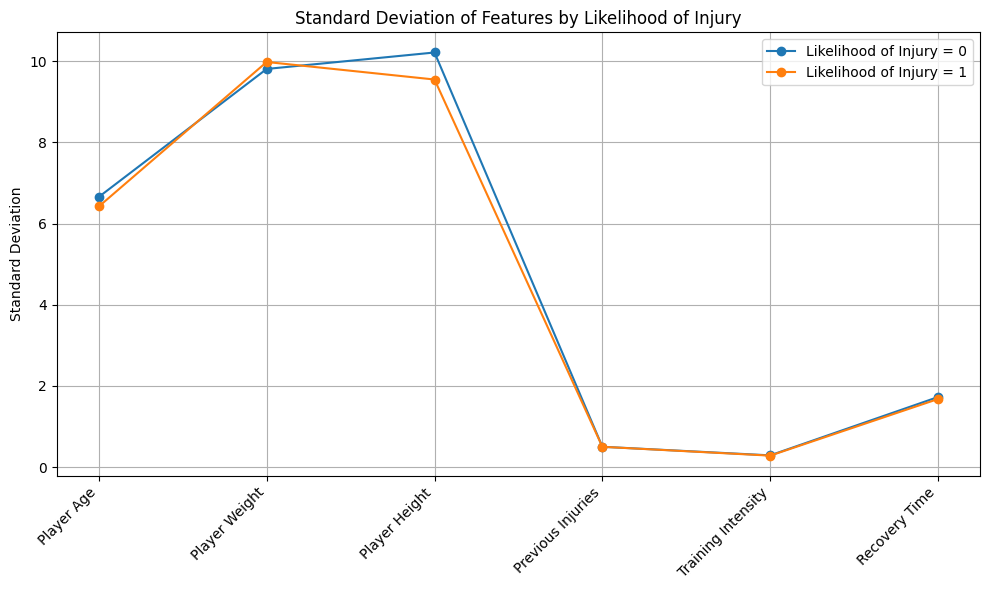

In [5]:
# Group by 'Likelihood_of_Injury' and calculate the standard deviation for each feature
standard_deviations = injury_dataset.groupby('Likelihood_of_Injury').std()

# Plot the standard deviations as line graphs
features = standard_deviations.columns
likelihoods = standard_deviations.index

fig, ax = plt.subplots(figsize=(10, 6))
for likelihood in likelihoods:
    ax.plot(features.str.replace('_', ' '), standard_deviations.loc[likelihood], marker='o', label=f'Likelihood of Injury = {likelihood}')

ax.set_title('Standard Deviation of Features by Likelihood of Injury')
ax.set_ylabel('Standard Deviation')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data Distribution Plots

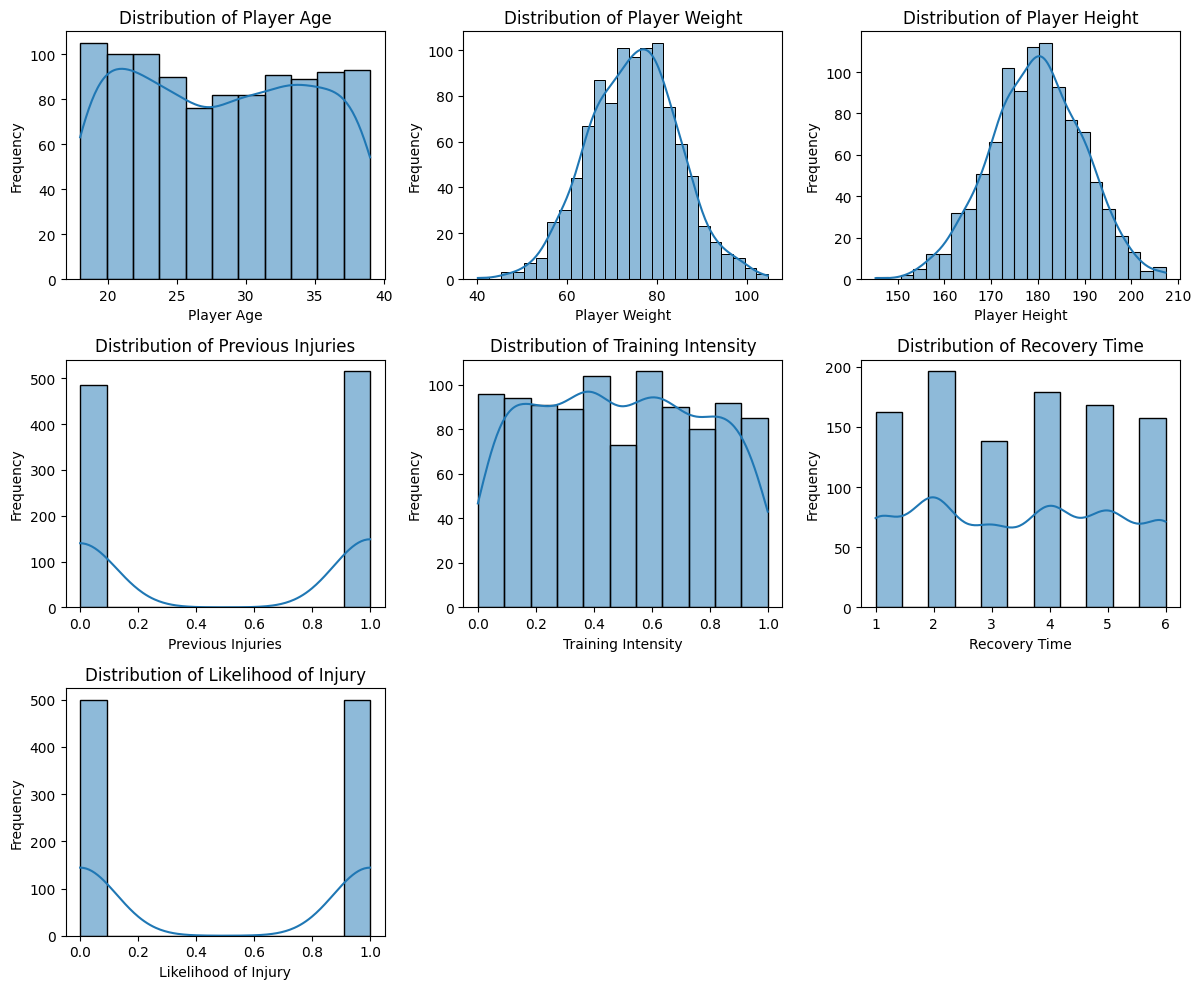

In [6]:
# Select columns excluding Likelihood_of_Injury
features_to_plot = injury_dataset.columns

plt.figure(figsize=(12, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(injury_dataset[feature], kde=True)
    plt.title(f'Distribution of {feature.replace('_',' ')}')
    plt.xlabel(feature.replace('_',' '))
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Regression

## Creating a logistic regression model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

injury_dataset = pd.read_csv('injury_data.csv')

# Separate features (X) and target variable (y)
X = injury_dataset.drop('Likelihood_of_Injury', axis=1)
y = injury_dataset['Likelihood_of_Injury']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Predicting on the training data

Classification Report:
                          precision    recall  f1-score   support

Not Likely To Be Injured       0.55      0.59      0.57       355
    Likely To Be Injured       0.54      0.50      0.52       345

                accuracy                           0.54       700
               macro avg       0.54      0.54      0.54       700
            weighted avg       0.54      0.54      0.54       700

Accuracy score for training data: 0.54

Confusion Matrix:
TP: 210, FN: 145, FP: 174, TN: 171


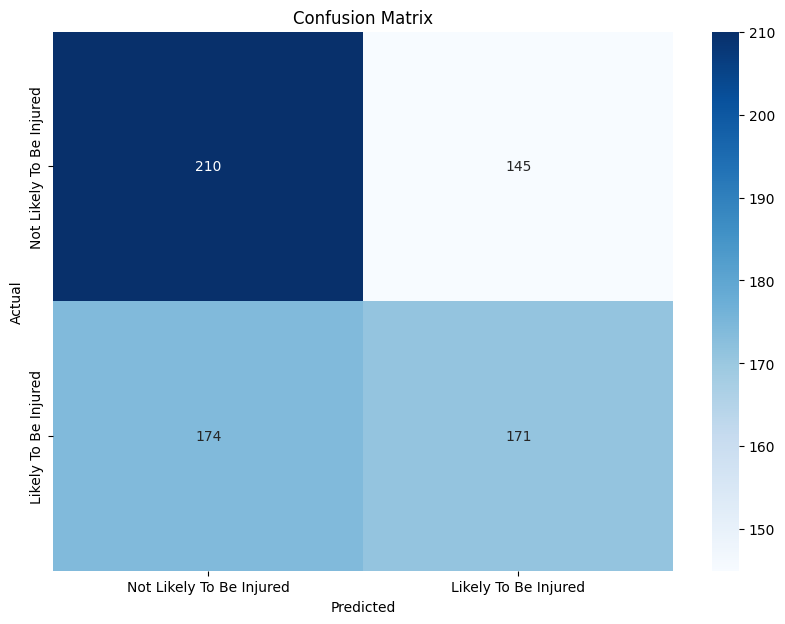

In [8]:
# Predict on the test set
y_pred_train = model.predict(X_train)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_train, y_pred_train, target_names=['Not Likely To Be Injured', 'Likely To Be Injured']))

# Print the accuracy score
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy score for training data: {accuracy:.2f}\n')

cm = confusion_matrix(y_train, y_pred_train)
TP, FN, FP, TN = cm.ravel()

print("Confusion Matrix:")
print(f"TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}")

import seaborn as sns
import matplotlib.pyplot as plt

# Define custom target names
target_names = ['Not Likely To Be Injured', 'Likely To Be Injured']

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Predicting on the test data

Classification Report:
                          precision    recall  f1-score   support

Not Likely To Be Injured       0.51      0.63      0.57       145
    Likely To Be Injured       0.56      0.45      0.50       155

                accuracy                           0.53       300
               macro avg       0.54      0.54      0.53       300
            weighted avg       0.54      0.53      0.53       300

Accuracy score for test data: 0.53

Confusion Matrix:
TP: 91, FN: 54, FP: 86, TN: 69


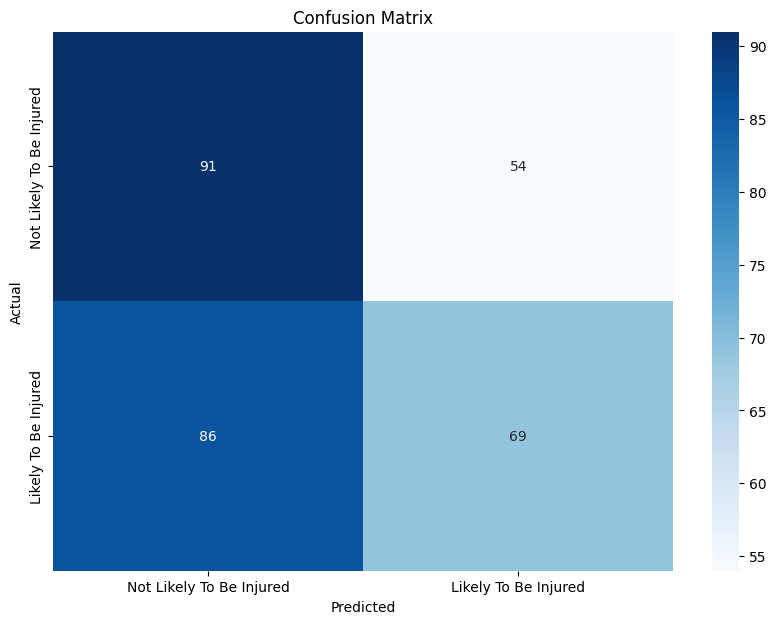

In [9]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Likely To Be Injured', 'Likely To Be Injured']))

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score for test data: {accuracy:.2f}\n')

cm = confusion_matrix(y_test, y_pred)
TP, FN, FP, TN = cm.ravel()

print("Confusion Matrix:")
print(f"TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}")

import seaborn as sns
import matplotlib.pyplot as plt

# Define custom target names
target_names = ['Not Likely To Be Injured', 'Likely To Be Injured']

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Attempting to improve the model

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

injury_dataset = pd.read_csv('injury_data.csv')

# Separate features (X) and target variable (y)
X = injury_dataset.drop('Likelihood_of_Injury', axis=1)
y = injury_dataset['Likelihood_of_Injury']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Resampling to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Pipeline for preprocessing and model
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True)),  # Adding polynomial features
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', RandomForestClassifier())  # Random Forest model
])

# Hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Best model
best_model = grid_search.best_estimator_

### Predicting on the training data

Classification Report:
                          precision    recall  f1-score   support

Not Likely To Be Injured       1.00      0.96      0.98       355
    Likely To Be Injured       0.96      1.00      0.98       345

                accuracy                           0.98       700
               macro avg       0.98      0.98      0.98       700
            weighted avg       0.98      0.98      0.98       700

Accuracy score for training data: 0.98

Confusion Matrix:
TP: 91, FN: 54, FP: 86, TN: 69


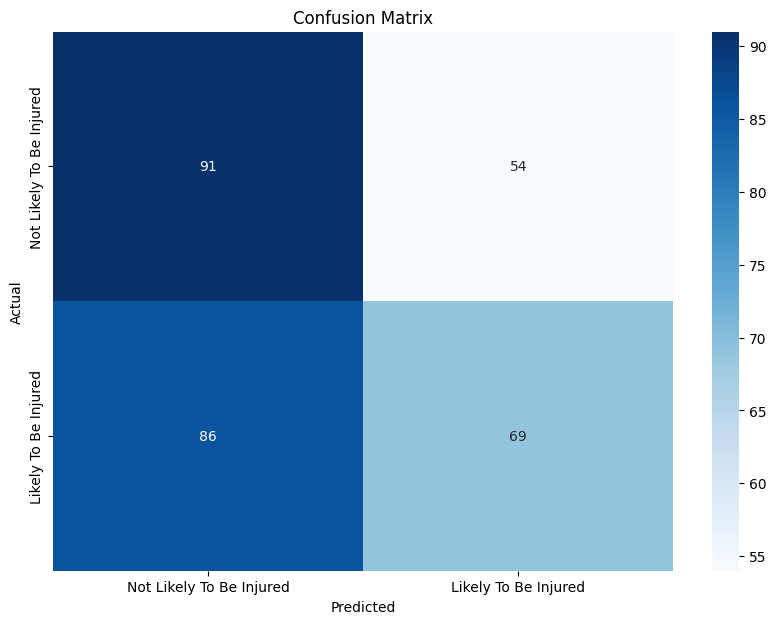

In [11]:
# Predict on the test set
y_pred_train = best_model.predict(X_train)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_train, y_pred_train, target_names=['Not Likely To Be Injured', 'Likely To Be Injured']))

# Print the accuracy score
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy score for training data: {accuracy:.2f}\n')

cm = confusion_matrix(y_test, y_pred)
TP, FN, FP, TN = cm.ravel()

print("Confusion Matrix:")
print(f"TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}")

import seaborn as sns
import matplotlib.pyplot as plt

# Define custom target names
target_names = ['Not Likely To Be Injured', 'Likely To Be Injured']

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Predicting on the test data

Classification Report:
                          precision    recall  f1-score   support

Not Likely To Be Injured       0.56      0.54      0.55       145
    Likely To Be Injured       0.59      0.61      0.60       155

                accuracy                           0.58       300
               macro avg       0.58      0.58      0.58       300
            weighted avg       0.58      0.58      0.58       300

Accuracy score for test data: 0.58

Confusion Matrix:
TP: 79, FN: 66, FP: 61, TN: 94


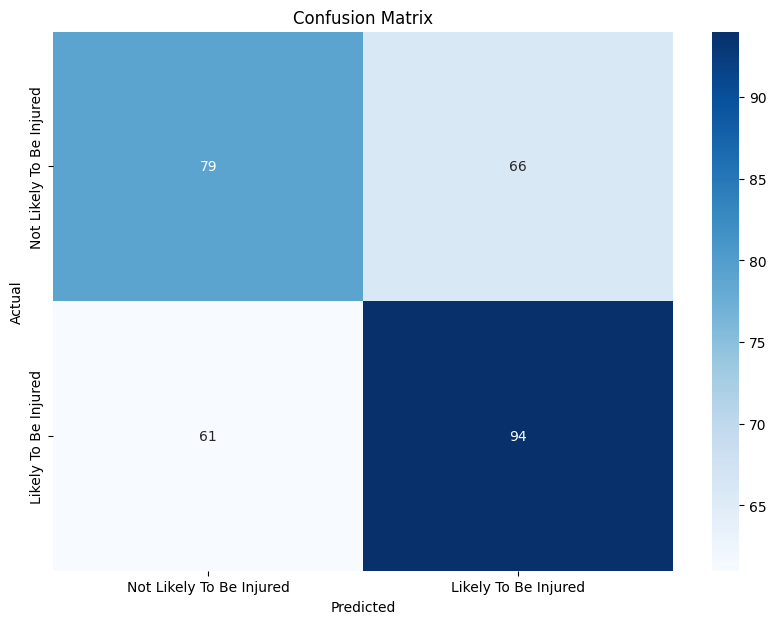

In [12]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Likely To Be Injured', 'Likely To Be Injured']))

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score for test data: {accuracy:.2f}\n')

cm = confusion_matrix(y_test, y_pred)
TP, FN, FP, TN = cm.ravel()

print("Confusion Matrix:")
print(f"TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}")

import seaborn as sns
import matplotlib.pyplot as plt

# Define custom target names
target_names = ['Not Likely To Be Injured', 'Likely To Be Injured']

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision tree

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

injury_dataset = pd.read_csv('injury_data.csv')

# Split the dataset into features (X) and target variable (Y)
X = injury_dataset.drop('Likelihood_of_Injury', axis=1)
Y = injury_dataset['Likelihood_of_Injury']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Predicting on the training data

                          precision    recall  f1-score   support

Not Likely To Be Injured       1.00      1.00      1.00       355
    Likely To Be Injured       1.00      1.00      1.00       345

                accuracy                           1.00       700
               macro avg       1.00      1.00      1.00       700
            weighted avg       1.00      1.00      1.00       700

Accuracy score for test data: 1.00

Confusion Matrix:
TP: 355, FN: 0, FP: 0, TN: 345


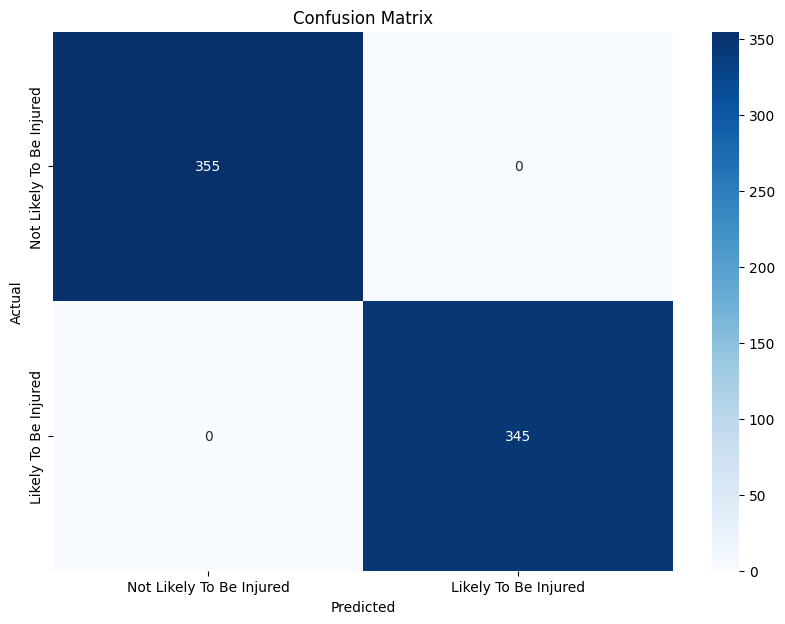

In [14]:
y_pred_train = tree_model.predict(X_train)

# Define custom target names
target_names = ['Not Likely To Be Injured', 'Likely To Be Injured']

# Print the classification report
print(classification_report(y_train, y_pred_train, target_names=target_names))

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_pred_train)
TP, FN, FP, TN = cm.ravel()

# Print the accuracy score
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy score for test data: {accuracy:.2f}\n')

print("Confusion Matrix:")
print(f"TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}")

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Predicting on the test data

                          precision    recall  f1-score   support

Not Likely To Be Injured       0.48      0.47      0.47       145
    Likely To Be Injured       0.51      0.52      0.52       155

                accuracy                           0.50       300
               macro avg       0.50      0.50      0.50       300
            weighted avg       0.50      0.50      0.50       300

Accuracy score for test data: 0.50

Confusion Matrix:
TP: 68, FN: 77, FP: 74, TN: 81


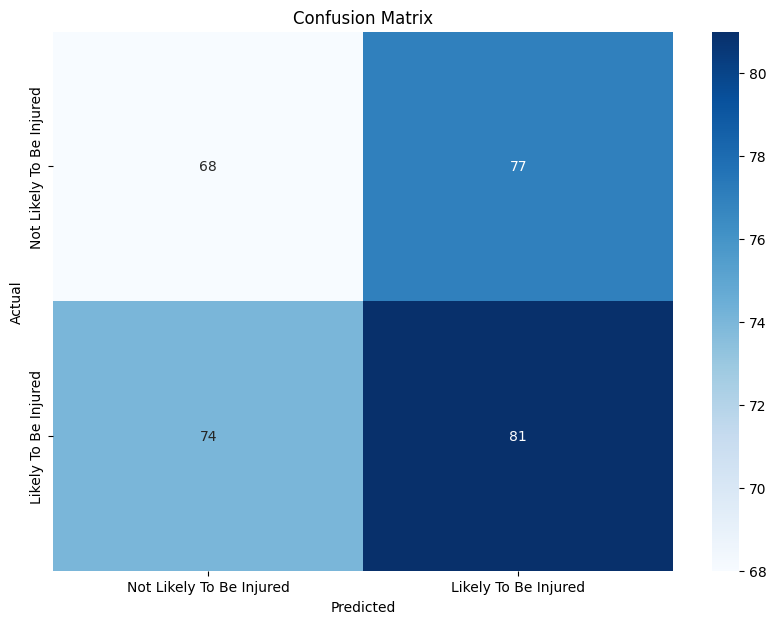

In [15]:
y_pred = tree_model.predict(X_test)

# Define custom target names
target_names = ['Not Likely To Be Injured', 'Likely To Be Injured']

# Print the classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
TP, FN, FP, TN = cm.ravel()

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score for test data: {accuracy:.2f}\n')

print("Confusion Matrix:")
print(f"TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}")

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Association rules

## Binning continuous features into categories

In [16]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

injury_dataset = pd.read_csv('injury_data.csv')

injury_dataset['Player_Age'] = pd.cut(injury_dataset['Player_Age'], bins=5, labels=['Very Young', 'Young', 'Middle Age', 'Old', 'Very Old'])
injury_dataset['Player_Weight'] = pd.cut(injury_dataset['Player_Weight'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
injury_dataset['Player_Height'] = pd.cut(injury_dataset['Player_Height'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
injury_dataset['Training_Intensity'] = pd.cut(injury_dataset['Training_Intensity'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Convert the remaining binary features to strings (if needed)
injury_dataset['Previous_Injuries'] = injury_dataset['Previous_Injuries'].astype('str')
injury_dataset['Recovery_Time'] = injury_dataset['Recovery_Time'].astype('str')
injury_dataset['Likelihood_of_Injury'] = injury_dataset['Likelihood_of_Injury'].astype('str')

# Print the modified DataFrame
print(injury_dataset.head())

   Player_Age Player_Weight Player_Height Previous_Injuries  \
0       Young        Medium        Medium                 1   
1    Very Old        Medium        Medium                 0   
2         Old          High          High                 0   
3  Middle Age          High        Medium                 1   
4       Young          High          High                 0   

  Training_Intensity Recovery_Time Likelihood_of_Injury  
0             Medium             5                    0  
1                Low             6                    1  
2               High             2                    1  
3                Low             4                    1  
4             Medium             1                    1  


## Converting the DataFrame to a one-hot encoded format

In [17]:
one_hot = pd.get_dummies(injury_dataset)
print(one_hot.head())

   Player_Age_Very Young  Player_Age_Young  Player_Age_Middle Age  \
0                  False              True                  False   
1                  False             False                  False   
2                  False             False                  False   
3                  False             False                   True   
4                  False              True                  False   

   Player_Age_Old  Player_Age_Very Old  Player_Weight_Very Low  \
0           False                False                   False   
1           False                 True                   False   
2            True                False                   False   
3           False                False                   False   
4           False                False                   False   

   Player_Weight_Low  Player_Weight_Medium  Player_Weight_High  \
0              False                  True               False   
1              False                  True              

## Applying the Apriori algorithm to find frequent itemsets

In [18]:
frequent_itemsets = apriori(one_hot, min_support=0.1, use_colnames=True)
print(frequent_itemsets)

    support                                           itemsets
0     0.262                            (Player_Age_Very Young)
1     0.173                                 (Player_Age_Young)
2     0.163                            (Player_Age_Middle Age)
3     0.182                                   (Player_Age_Old)
4     0.220                              (Player_Age_Very Old)
..      ...                                                ...
79    0.109  (Previous_Injuries_1, Likelihood_of_Injury_0, ...
80    0.136  (Previous_Injuries_1, Likelihood_of_Injury_1, ...
81    0.125  (Previous_Injuries_0, Likelihood_of_Injury_0, ...
82    0.102  (Previous_Injuries_1, Likelihood_of_Injury_0, ...
83    0.126  (Previous_Injuries_1, Likelihood_of_Injury_1, ...

[84 rows x 2 columns]


## Generating association rules from the frequent itemsets

In [19]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

## Analyzing the rules

### Displaying the rules according to support, confidence and lift

In [20]:
rules = rules.sort_values(by='support', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

                 antecedents               consequents  support  confidence  \
22  (Likelihood_of_Injury_1)     (Previous_Injuries_1)    0.267    0.534000   
21     (Previous_Injuries_1)  (Likelihood_of_Injury_1)    0.267    0.518447   
16  (Likelihood_of_Injury_0)     (Previous_Injuries_0)    0.252    0.504000   
15     (Previous_Injuries_0)  (Likelihood_of_Injury_0)    0.252    0.519588   
7     (Player_Weight_Medium)     (Previous_Injuries_1)    0.245    0.529158   

        lift  
22  1.036893  
21  1.036893  
16  1.039175  
15  1.039175  
7   1.027491  


In [21]:
rules = rules.sort_values(by='confidence', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

                                       antecedents               consequents  \
4                               (Player_Age_Young)     (Previous_Injuries_1)   
38  (Likelihood_of_Injury_1, Player_Height_Medium)     (Previous_Injuries_1)   
34  (Likelihood_of_Injury_1, Player_Weight_Medium)     (Previous_Injuries_1)   
35     (Previous_Injuries_0, Player_Height_Medium)  (Likelihood_of_Injury_0)   
18                        (Training_Intensity_Low)     (Previous_Injuries_1)   

    support  confidence      lift  
4     0.101    0.583815  1.133621  
38    0.126    0.567568  1.102073  
34    0.136    0.566667  1.100324  
35    0.125    0.565611  1.131222  
18    0.114    0.564356  1.095838  


In [22]:
rules = rules.sort_values(by='lift', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

                                       antecedents               consequents  \
36  (Likelihood_of_Injury_0, Player_Height_Medium)     (Previous_Injuries_0)   
4                               (Player_Age_Young)     (Previous_Injuries_1)   
35     (Previous_Injuries_0, Player_Height_Medium)  (Likelihood_of_Injury_0)   
0                          (Player_Age_Very Young)    (Player_Height_Medium)   
23                   (Training_Intensity_Very Low)  (Likelihood_of_Injury_0)   

    support  confidence      lift  
36    0.125    0.550661  1.135383  
4     0.101    0.583815  1.133621  
35    0.125    0.565611  1.131222  
0     0.133    0.507634  1.130587  
23    0.115    0.555556  1.111111  


### Showing the spread of the rules

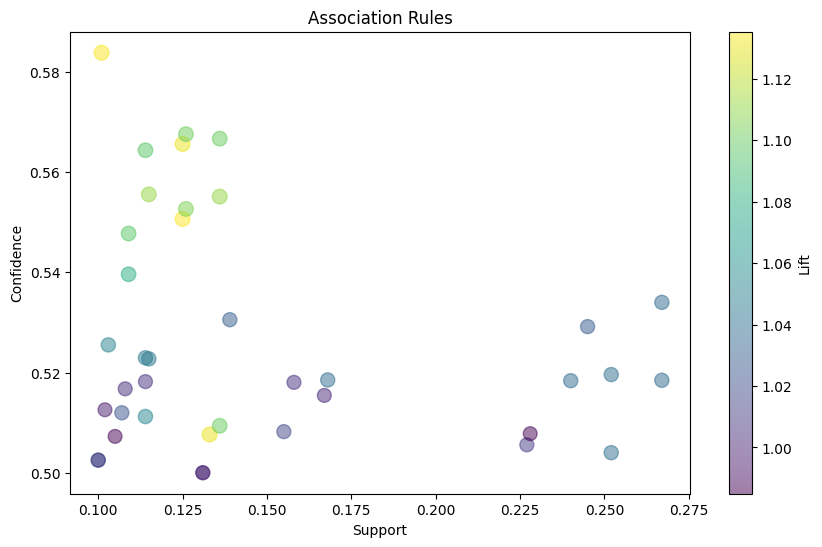

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], s=rules['lift']*100, alpha=0.5, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()

# Clustering (K-means)

Silhouette Score: 0.15


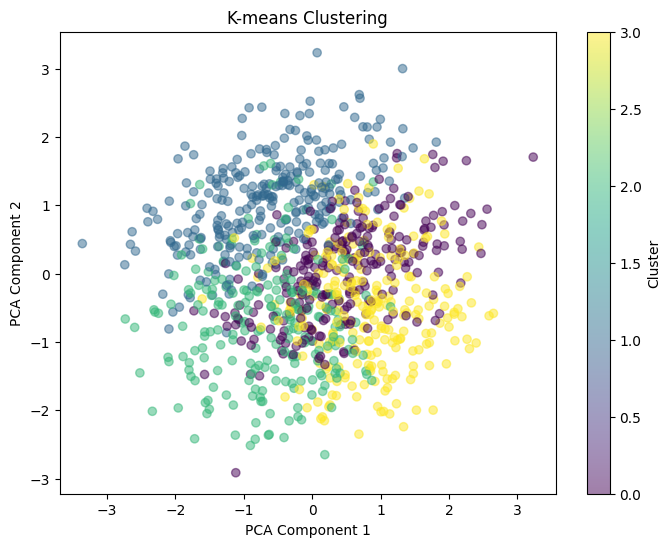

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
injury_dataset = pd.read_csv('injury_data.csv')

# Drop any non-numeric columns or columns that aren't relevant for clustering
X = injury_dataset.drop('Likelihood_of_Injury', axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
num_clusters = 4  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Evaluate the clustering
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualize the clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()